<a href="https://colab.research.google.com/github/danielsoy/ALOCC-CVPR2018/blob/master/padim_example_continuo_funka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Padim Example

#### Import dependencies

In [ ]:
import os
import anodet
import numpy as np
import torch
import cv2
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from time import sleep


# 

## Training

In this notebook the MVTec dataset will be used. It can be downloaded from: https://www.mvtec.com/company/research/datasets/mvtec-ad.

Change `DATASET_PATH` to the path where you save the dataset.

Also, if you want to save and load the model. Add a folder where to save them and change the path of `MODEL_DATA_PATH` to that folder.

In [ ]:
DATASET_PATH = os.path.realpath("C:\\Users\libro/anodet\mvtec")
MODEL_DATA_PATH = os.path.realpath("C:\\Users\libro/anodet/distributions")

#### Load dataset

In [ ]:
dataset = anodet.AnodetDataset(os.path.join(DATASET_PATH, "anodet/train/good"))
dataloader = DataLoader(dataset, batch_size=32)
print("Number of images in dataset:", len(dataloader.dataset))

Number of images in dataset: 719


#### Init the model

In [ ]:
padim = anodet.Padim(backbone='resnet18')

#### Fit the model to the dataset

In [ ]:
padim.fit(dataloader)

Feature extraction: 100%|██████████| 23/23 [00:50<00:00,  2.19s/it]


#### Save the necessary parameters

In [ ]:
distributions_path = './distributions/'
torch.save(padim.mean, os.path.join(MODEL_DATA_PATH, "bottle_mean.pt"))
torch.save(padim.cov_inv, os.path.join(MODEL_DATA_PATH, "bottle_cov_inv.pt"))

In [ ]:
cap=cv2.VideoCapture(0)  # si no se ve nada, ver si la camara esta funcionando

# 

## Inference
#### Load test images

In [ ]:
mean = torch.load(os.path.join(MODEL_DATA_PATH, 'bottle_mean.pt'))
cov_inv = torch.load(os.path.join(MODEL_DATA_PATH, 'bottle_cov_inv.pt'))

Image scores: tensor([21.6361])
Image classifications: tensor([0.])


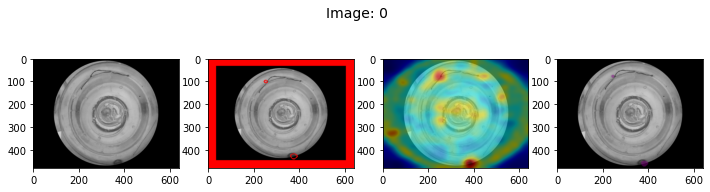

KeyboardInterrupt: 

In [ ]:
while True:
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  ### +COLOR +luz ,+sensibilidad. mas traininig, mas sutiliza.
    frame = cv2.circle(frame, (320, 240), 350, (0,0,0), thickness=240 , lineType=cv2.LINE_AA)  # mascara original externa
    cv2.imwrite("C:\\Users\libro/anodet\mvtec/anodet/webcam.jpg",frame)



    paths = [os.path.join(DATASET_PATH, "anodet/webcam.jpg"),   
    ]

    images = []
    for path in paths:
        image = cv2.imread(path)
       # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)

    batch = anodet.to_batch(images, anodet.standard_image_transform, torch.device('cpu'))


    # mean = torch.load(os.path.join(MODEL_DATA_PATH, 'bottle_mean.pt'))
    # cov_inv = torch.load(os.path.join(MODEL_DATA_PATH, 'bottle_cov_inv.pt'))


    padim = anodet.Padim(backbone='resnet18', mean=mean, cov_inv=cov_inv, device=torch.device('cpu'))


    image_scores, score_maps = padim.predict(batch)


    THRESH = 19
    score_map_classifications = anodet.classification(score_maps, THRESH)
    image_classifications = anodet.classification(image_scores, THRESH)
    print("Image scores:", image_scores)
    print("Image classifications:", image_classifications)



    test_images = np.array(images).copy()


    boundary_images = anodet.visualization.framed_boundary_images(test_images, score_map_classifications, image_classifications, padding=40)
    heatmap_images = anodet.visualization.heatmap_images(test_images, score_maps, alpha=0.5)
    highlighted_images = anodet.visualization.highlighted_images(images, score_map_classifications, color=(128, 0, 128))

    for idx in range(len(images)):
        fig, axs = plt.subplots(1, 4, figsize=(12, 6))
        fig.suptitle('Image: ' + str(idx), y=0.75, fontsize=14)
        axs[0].imshow(images[idx])
        axs[1].imshow(boundary_images[idx])
        axs[2].imshow(heatmap_images[idx])
        axs[3].imshow(highlighted_images[idx])
        #plt.show()


        plt.show(block=False)
        plt.pause(5)
        plt.close()


        print("fin")    

In [ ]:
qqqqqqqqqqqqqqqqqqq